In [ ]:
%env SM_FRAMEWORK=tf.keras

env: SM_FRAMEWORK=tf.keras


In [ ]:
!pip install -U segmentation-models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.0 MB/s eta 0:00:00


In [ ]:
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [ ]:
import keras
import tensorflow as tf
print(keras.__version__)
print(tf.__version__)

2.12.0
2.12.0


Base Code

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/CVPro/train_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: clips/0313-1/24060/19.jpg  
  inflating: clips/0313-1/24060/18.jpg  
  inflating: clips/0313-1/24060/17.jpg  
  inflating: clips/0313-1/24060/16.jpg  
  inflating: clips/0313-1/24060/15.jpg  
  inflating: clips/0313-1/24060/14.jpg  
  inflating: clips/0313-1/24060/13.jpg  
  inflating: clips/0313-1/24060/12.jpg  
  inflating: clips/0313-1/24060/11.jpg  
  inflating: clips/0313-1/24060/10.jpg  
  inflating: clips/0313-1/24060/9.jpg  
  inflating: clips/0313-1/24060/8.jpg  
  inflating: clips/0313-1/24060/7.jpg  
  inflating: clips/0313-1/24060/6.jpg  
  inflating: clips/0313-1/24060/5.jpg  
  inflating: clips/0313-1/24060/4.jpg  
  inflating: clips/0313-1/24060/3.jpg  
  inflating: clips/0313-1/24060/2.jpg  
  inflating: clips/0313-1/24060/1.jpg  
   creating: clips/0313-1/12320/
  inflating: clips/0313-1/12320/20.jpg  
  inflating: clips/0313-1/12320/19.jpg  
  inflating: clips/0313-1/12320/18.jpg  
  inflating: clips/0313

In [ ]:
from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
import glob
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
%matplotlib inline

json_gt = [json.loads(line) for line in open('/content/label_data_0601.json')]
print(np.shape(json_gt))

image_names = []
mask_names = []

for i in range(np.shape(json_gt)[0]):
    gt = json_gt[i]
    gt_lanes = gt['lanes']
    y_samples = gt['h_samples']
    raw_file = gt['raw_file']
    address = '/content/'+raw_file
    image_names.append(address)
    image = plt.imread(address)
    #image = cv2.resize(image, dsize=(320, 180), interpolation=cv2.INTER_CUBIC)

    #print(np.shape(image))
    #image = image.resize((200, 200,3))
    gt_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in gt_lanes]
    # Create an empty mask
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    # Draw a rectangle on the mask
    for lane in gt_lanes_vis:
        for pt in lane:
            cv2.polylines(mask, np.int32([lane]), isClosed=False, color=(255,255,255), thickness=5)

    mask = mask.astype(np.uint8)
    #print(np.shape(mask))

    tosave = Image.fromarray(mask)
    mask_add = '/content/Masks/'+raw_file[11:30]+'.png'
    mask_names.append(mask_add)
    tosave.save(mask_add)

json_gt = [json.loads(line) for line in open('/content/label_data_0313.json')]
print(np.shape(json_gt))

for i in range(np.shape(json_gt)[0]):
    gt = json_gt[i]
    gt_lanes = gt['lanes']
    y_samples = gt['h_samples']
    raw_file = gt['raw_file']
    address = '/content/'+raw_file
    image_names.append(address)
    image = plt.imread(address)
    #image = cv2.resize(image, dsize=(320, 180), interpolation=cv2.INTER_CUBIC)

    #print(np.shape(image))
    #image = image.resize((200, 200,3))
    gt_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in gt_lanes]
    # Create an empty mask
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    # Draw a rectangle on the mask
    for lane in gt_lanes_vis:
        for pt in lane:
            cv2.polylines(mask, np.int32([lane]), isClosed=False, color=(255,255,255), thickness=5)

    mask = mask.astype(np.uint8)
    #print(np.shape(mask))

    tosave = Image.fromarray(mask)
    if len(raw_file) == 22:
        mask_add = '/content/Masks/'+raw_file[13:15]+'.png'
        mask_names.append(mask_add)
        tosave.save(mask_add)
    elif len(raw_file) == 23:
        mask_add = '/content/Masks/'+raw_file[13:16]+'.png'
        mask_names.append(mask_add)
        tosave.save(mask_add)
    elif len(raw_file) == 24:
        mask_add = '/content/Masks/'+raw_file[13:17]+'.png'
        mask_names.append(mask_add)
        tosave.save(mask_add)
    elif len(raw_file) == 25:
        mask_add = '/content/Masks/'+raw_file[13:18]+'.png'
        mask_names.append(mask_add)
        tosave.save(mask_add)
    elif len(raw_file) == 26:
        mask_add = '/content/Masks/'+raw_file[13:19]+'.png'
        mask_names.append(mask_add)
        tosave.save(mask_add)


print(np.shape(image_names))
print(np.shape(mask_names))

(410,)
(2858,)
(3268,)
(3268,)


In [ ]:
num_images = 400

image_names_subset = image_names[0:num_images]
images = [cv2.resize(cv2.imread(img), dsize=(320, 180), interpolation=cv2.INTER_CUBIC) for img in image_names_subset]
images2 = [cv2.resize(cv2.imread(img), dsize=(256, 256), interpolation=cv2.INTER_CUBIC) for img in image_names_subset]

#images = [cv2.imread(img) for img in image_names_subset]


image_dataset = np.array(images)
image_dataset = np.expand_dims(image_dataset, axis = 4)

image_dataset2 = np.array(images2)
image_dataset2 = np.expand_dims(image_dataset2, axis = 4)

mask_names_subset = mask_names[0:num_images]
masks = [cv2.resize(cv2.imread(mask, 0), dsize=(320, 180), interpolation=cv2.INTER_NEAREST) for mask in mask_names_subset]
masks2 = [cv2.resize(cv2.imread(mask, 0), dsize=(256, 256), interpolation=cv2.INTER_NEAREST) for mask in mask_names_subset]

#masks = [cv2.imread(mask, 0) for mask in mask_names_subset]
mask_dataset = np.array(masks)
mask_dataset = np.expand_dims(mask_dataset, axis = 3)

mask_dataset2 = np.array(masks2)
mask_dataset2 = np.expand_dims(mask_dataset2, axis = 3)

print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
print("Labels in the mask are : ", np.unique(mask_dataset))

Image data shape is:  (400, 180, 320, 3, 1)
Mask data shape is:  (400, 180, 320, 1)
Max pixel value in image is:  255
Labels in the mask are :  [  0 255]


In [ ]:
#Normalize images
image_dataset = image_dataset /255.  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
mask_dataset = mask_dataset /255.  #PIxel values will be 0 or 1

#Normalize images
image_dataset2 = image_dataset2 /255.  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
mask_dataset2 = mask_dataset2 /255.  #PIxel values will be 0 or 1

# Compare Models

In [ ]:
#Load previously saved model
from keras.models import load_model
from tensorflow.keras.metrics import MeanIoU
import cv2
import numpy as np
import matplotlib.pyplot as plt

model1 = load_model("/content/gdrive/MyDrive/CVPro/400image30epochsFinal.hdf5", compile=False)
#model2 = load_model("/content/gdrive/MyDrive/CVPro/400image30epochsBirdFinal.hdf5", compile=False)
model3 = load_model("/content/gdrive/MyDrive/CVPro/resnet34_backbone_60_epochs_400.hdf5", compile=False)
model4 = load_model("/content/gdrive/MyDrive/CVPro/res34_backbone_60_epochs_800.hdf5", compile=False)
model5 = load_model("/content/gdrive/MyDrive/CVPro/res34_backbone_60_epochs_1200.hdf5", compile=False)
model6 = load_model("/content/gdrive/MyDrive/CVPro/resNext50_backbone_60_epochs_400.hdf5", compile=False)
model7 = load_model("/content/gdrive/MyDrive/CVPro/nex50_backbone_60_epochs_800.hdf5", compile=False)

IMAGE_H = 180
IMAGE_W = 320

src = np.float32([[50, 155], [90, 118], [235, 118], [273, 155]])
dst = np.float32([[130, 173], [130, 153], [170, 153], [170, 173]])

M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
Minv = cv2.getPerspectiveTransform(dst, src) # Inverse transformation

X_test_b = np.zeros([num_images,IMAGE_H,IMAGE_W,3,1])
y_test_b = np.zeros([num_images,IMAGE_H,IMAGE_W,1])

for i in range(num_images):
    X_test_b[i,:,:,:,0] = cv2.warpPerspective(image_dataset[i,:,:,:,0], M, (IMAGE_W, IMAGE_H))
    y_test_b[i,:,:,0] = cv2.warpPerspective(mask_dataset[i,:,:,0], M, (IMAGE_W, IMAGE_H))


#Prediction
y_pred1=model1.predict(image_dataset)
y_pred_thresholded1 = y_pred1 > 0.4

#y_pred2=model2.predict(X_test_b)
#y_pred_thresholded2 = y_pred2 > 0.4

y_pred3=model3.predict(image_dataset2)
y_pred_thresholded3 = y_pred3 > 0.4

y_pred4=model4.predict(image_dataset2)
y_pred_thresholded4 = y_pred4 > 0.4

y_pred5=model5.predict(image_dataset2)
y_pred_thresholded5 = y_pred5 > 0.4

y_pred6=model6.predict(image_dataset2)
y_pred_thresholded6 = y_pred6 > 0.4

y_pred7=model7.predict(image_dataset2)
y_pred_thresholded7 = y_pred7 > 0.4


n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes) 

IOU_keras.update_state(y_pred_thresholded1, mask_dataset)
print("UNet (400 images) Mean IoU =", IOU_keras.result().numpy())

#IOU_keras.update_state(y_pred_thresholded2, y_test_b)
#print("Model 2 Mean IoU =", IOU_keras.result().numpy())

IOU_keras.update_state(y_pred_thresholded3, mask_dataset2)
print("ResNet+UNet (400 images) Mean IoU =", IOU_keras.result().numpy())

IOU_keras.update_state(y_pred_thresholded4, mask_dataset2)
print("ResNet+UNet (800 images) Mean IoU =", IOU_keras.result().numpy())

IOU_keras.update_state(y_pred_thresholded5, mask_dataset2)
print("ResNet+UNet (1200 images) Mean IoU =", IOU_keras.result().numpy())

IOU_keras.update_state(y_pred_thresholded6, mask_dataset2)
print("ResNeXt+UNet (400 images) Mean IoU =", IOU_keras.result().numpy())

IOU_keras.update_state(y_pred_thresholded7, mask_dataset2)
print("ResNeXt+UNet (800 images) Mean IoU =", IOU_keras.result().numpy())


13/13 [==============================] - 8s 222ms/step
UNet (400 images) Mean IoU = 0.6941029
ResNet+UNet (400 images) Mean IoU = 0.7786629
ResNet+UNet (800 images) Mean IoU = 0.8051513
ResNet+UNet (1200 images) Mean IoU = 0.81514186
ResNeXt+UNet (400 images) Mean IoU = 0.82617605
ResNeXt+UNet (800 images) Mean IoU = 0.83302534


# Generate Output

1/1 [==============================] - 0s 55ms/step


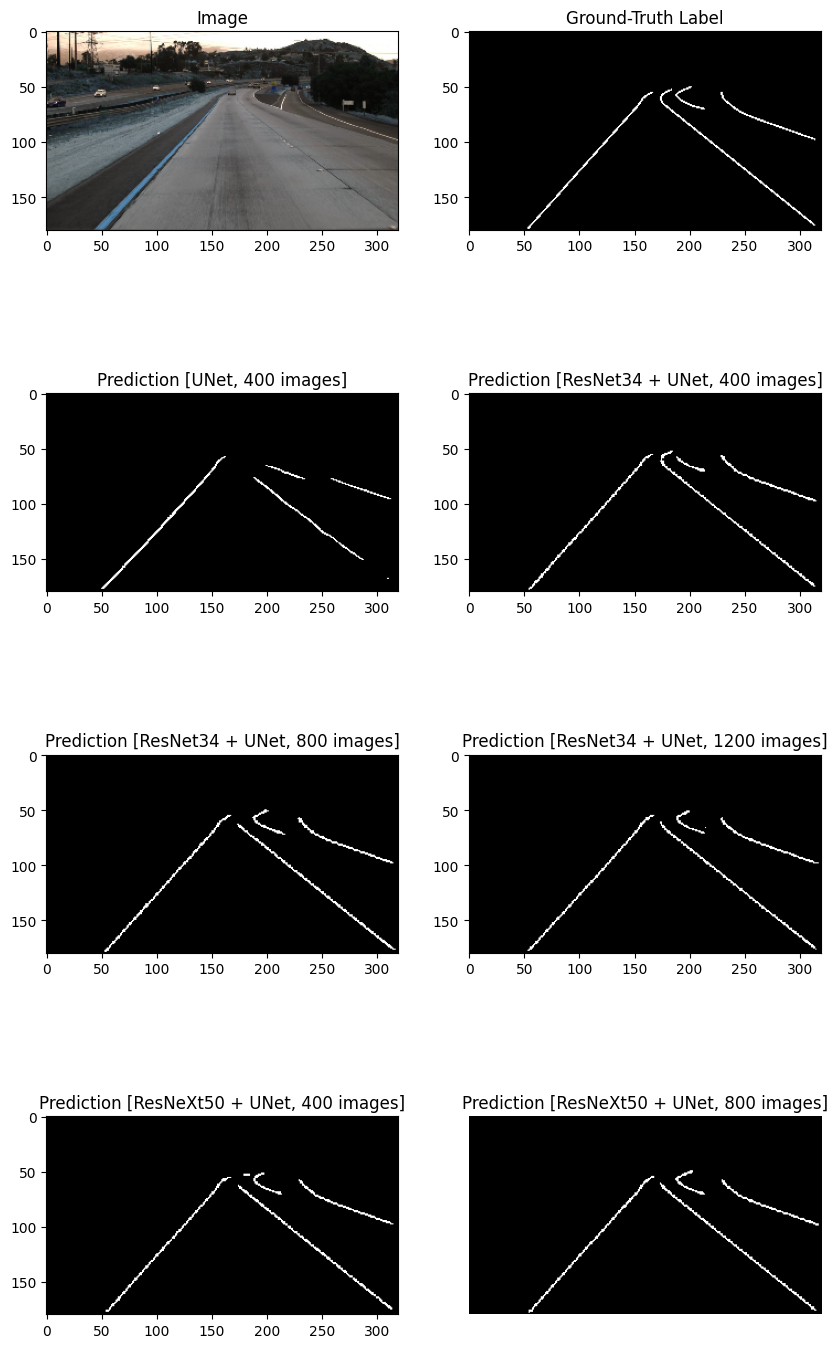

In [ ]:
import random

threshold = 0.4
test_img_number = random.randint(0, len(image_dataset)-1)
test_img = image_dataset[test_img_number]
test_img2 = image_dataset2[test_img_number]
test_img3 = X_test_b[test_img_number]

ground_truth=mask_dataset[test_img_number]
test_img_input=np.expand_dims(test_img, 0)

ground_truth2=mask_dataset2[test_img_number]
test_img_input2=np.expand_dims(test_img2, 0)

test_img_input3=np.expand_dims(test_img3, 0)

#print(test_img_input.shape)

prediction1 = (model1.predict(test_img_input)[0,:,:,0] > 0.4).astype(np.uint8)
#prediction2 = (model2.predict(test_img_input3)[0,:,:,0] > 0.4).astype(np.uint8)
#myresult2 = cv2.warpPerspective(prediction2, Minv, (IMAGE_W, IMAGE_H))

prediction3 = (model3.predict(test_img_input2)[0,:,:,0] > 0.1).astype(np.uint8)
prediction4 = (model4.predict(test_img_input2)[0,:,:,0] > 0.1).astype(np.uint8)
prediction5 = (model5.predict(test_img_input2)[0,:,:,0] > 0.1).astype(np.uint8)
prediction6 = (model6.predict(test_img_input2)[0,:,:,0] > 0.1).astype(np.uint8)
prediction7 = (model7.predict(test_img_input2)[0,:,:,0] > 0.1).astype(np.uint8)

plt.figure(figsize=(10, 18))
plt.subplot(421)
plt.title('Image')
plt.imshow(cv2.resize(test_img[:,:,:,0], dsize=(320, 180), interpolation=cv2.INTER_CUBIC))
plt.subplot(422)
plt.title('Ground-Truth Label')
plt.imshow(cv2.resize(ground_truth[:,:,0], dsize=(320, 180), interpolation=cv2.INTER_NEAREST), cmap='gray')
plt.subplot(423)
plt.title('Prediction [UNet, 400 images]')
plt.imshow(cv2.resize(prediction1, dsize=(320, 180), interpolation=cv2.INTER_NEAREST), cmap='gray')
plt.subplot(424)
plt.title('Prediction [ResNet34 + UNet, 400 images]')
plt.imshow(cv2.resize(prediction3, dsize=(320, 180), interpolation=cv2.INTER_NEAREST), cmap='gray')
plt.subplot(425)
plt.title('Prediction [ResNet34 + UNet, 800 images]')
plt.imshow(cv2.resize(prediction4, dsize=(320, 180), interpolation=cv2.INTER_NEAREST), cmap='gray')
plt.subplot(426)
plt.title('Prediction [ResNet34 + UNet, 1200 images]')
plt.imshow(cv2.resize(prediction5, dsize=(320, 180), interpolation=cv2.INTER_NEAREST), cmap='gray')
plt.subplot(427)
plt.title('Prediction [ResNeXt50 + UNet, 400 images]')
plt.imshow(cv2.resize(prediction6, dsize=(320, 180), interpolation=cv2.INTER_NEAREST), cmap='gray')
plt.subplot(428)
plt.title('Prediction [ResNeXt50 + UNet, 800 images]')
plt.imshow(cv2.resize(prediction7, dsize=(320, 180), interpolation=cv2.INTER_NEAREST), cmap='gray')

plt.axis('off')

plt.show()